In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [532]:
mean = 0.0
variance = 1.0
q = np.random.normal(loc=mean, scale =variance, size=10)
print(q)

[ 0.20061413 -1.13453437 -0.0318485  -1.47610907  0.73295296  0.36273449
 -0.08021296 -0.40409061 -0.70161162 -0.14176489]


### Action selection function:

In [533]:
def ϵ_greedy_selection(ϵ, Q):
    p = np.random.uniform()
    if p<ϵ:
        # Selection of a random action with probability ϵ
        return np.argmax(np.random.uniform(size=10))
    else:
        # Selection of max value action with probability 1-ϵ
        return np.argmax(Q)

### 2000 runs (each 10000 steps)

#### value : incrementally computed

In [534]:
step= 1000
ϵ_num=3
ϵ_list = [0, 0.01, 0.1]
result = np.zeros(shape=(ϵ_num,step))
for k in range(ϵ_num):
    R_memory = np.zeros(shape=(step))
    max_result = np.zeros(shape=(step))
    M=0
    ϵ = ϵ_list[k]
    for j in range(200):
        M = M+1
        Q = np.zeros(10)
        A = np.array([])
        N = np.zeros(10)
        for i in range(step):
            a = ϵ_greedy_selection(ϵ, Q)
            N[a] = N[a]+1
            α = 1/N[a]
            R = np.random.normal(loc=q[a], scale =1)
            Q[a] = Q[a] + α*(R-Q[a]) 
            
            R_memory[i] = R_memory[i] + 1.0/M * (R-R_memory[i])
            max_result[i] = np.max(q)
            
    result[k] = R_memory

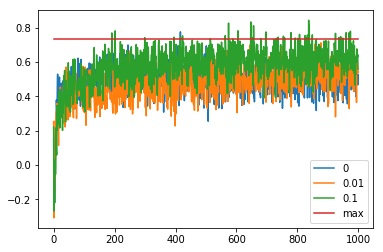

In [535]:
for k in range(ϵ_num):
    plt.plot(result[k])
plt.plot(max_result)
plt.legend(["0","0.01","0.1", 'max'])

### Exercise 2.5
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ϵ = 0.1 and longer runs, say of 10,000 steps.

In [528]:
steps = 10000

In [569]:
mean = 0.0
variance = 1.0
change_variance = 0.01
q = np.random.normal(loc=mean, scale =variance, size=(1,10))

for i in range(steps-1):
    q = np.append(q, [q[-1]+np.random.normal(loc=mean, scale =change_variance, size=10)], axis=0 )

In [583]:
α_num = 2
α_list = [[1,0], [0,1]]
result = np.zeros(shape=(α_num,steps))
for k in range(α_num):
    R_memory = np.zeros(shape=(steps))
    max_result = np.zeros(shape=(steps))
    M=0
    ϵ = 0.1
    for j in range(2000):
        M = M+1
        Q = np.zeros(10)
        A = np.array([])
        N = np.zeros(10)
        for i in range(steps):
            a = ϵ_greedy_selection(ϵ, Q)
            N[a] = N[a]+1
            α = 1/N[a]*α_list[k][0] + 0.1*α_list[k][1]
            R = np.random.normal(loc=q[i, a], scale =1)
            Q[a] = Q[a] + α*(R-Q[a]) 
            
            R_memory[i] = R_memory[i] + 1.0/M * (R-R_memory[i])
            max_result[i] = np.max(q[i])
            
    result[k] = R_memory

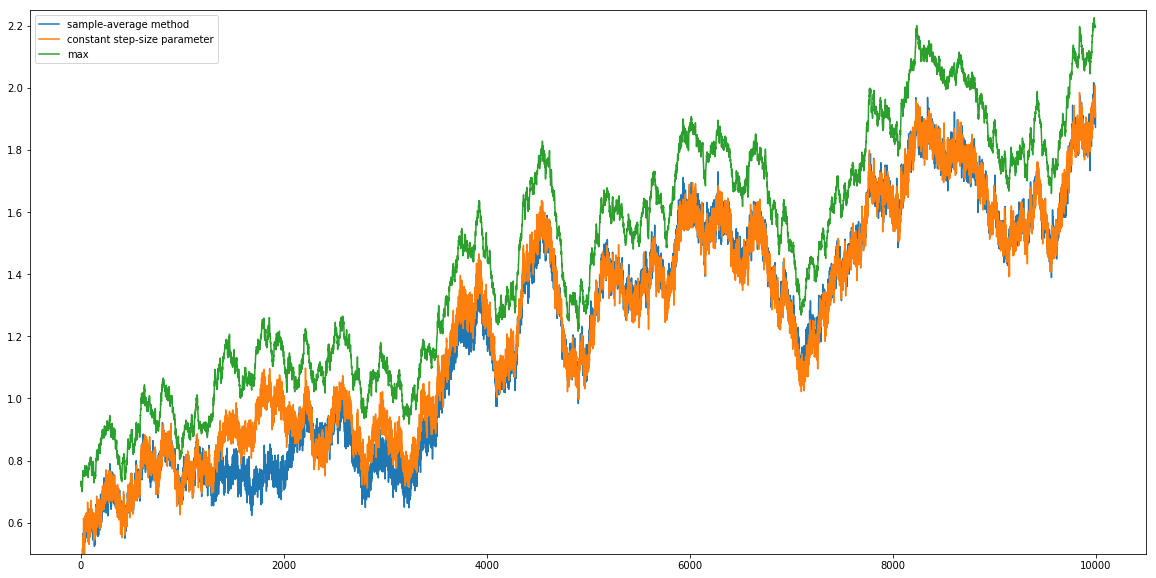

In [595]:
plt.figure(figsize=(20,10))
plt.ylim(.5,2.25)
for k in range(α_num):
    plt.plot(result[k])
plt.plot(max_result)
plt.legend(["sample-average method","constant step-size parameter", 'max'])
